# Análisis del ritmo cardiaco: reposo vs ejercicio ligero
Es el sexto día de este reto. He tenido una mala noche de sueño. Al despertar por la mañana vi mi reloj deportivo y éste me dijo que mi ritmo cardiaco durante mi noche fue considerablemente más alto de lo normal. Así obtengo la idea de hoy: examinaremos cómo varía el ritmo cardiaco, en particular en reposo y tras ejercicio ligero. Al igual que ayer vamos a explicar conceptos básicos de pruebas estadísticas para tenerlos más claros.

Usaremos estadística descriptiva, visualización y pruebas estadísticas para evaluar si la diferencia observada es significativa o no.

## Importación de librerías
Primero, importamos las librerías necesarias para el procesamiento, análisis y visualización.

In [1]:
# Análisis de datos, graficas y estadística básica descriptiva.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Datos simulados
Supongamos que medimos nuestro ritmo cardiaco promedio en reposo y el promedio justo después ejercicio ligero. Lo hacemos durante 60 días. Entonces tendremos 60 entradas para cada variable.

In [2]:
import pandas as pd

# 60 observaciones ritmo cardiaco en reposo.
reposo = pd.Series([
    65, 67, 64, 66, 68, 65, 67, 66, 68, 65,
    64, 67, 66, 65, 67, 68, 63, 66, 68, 65,
    66, 67, 64, 68, 65, 67, 66, 67, 64, 66,

    65, 66, 68, 67, 65, 65, 67, 64, 66, 68,
    67, 66, 67, 68, 66, 65, 67, 66, 65, 66,
    68, 66, 64, 67, 67, 65, 68, 65, 67, 66
])

# 60 observaciones ritmo cardiaco tras ejercicio ligero.
ejercicio = pd.Series([
    78, 80, 77, 79, 81, 78, 80, 79, 81, 78,
    77, 80, 79, 78, 80, 81, 76, 79, 81, 78,
    79, 80, 77, 81, 78, 80, 79, 80, 77, 79,

    78, 80, 81, 80, 78, 77, 80, 78, 80, 81,
    80, 78, 79, 81, 80, 78, 81, 79, 78, 80,
    81, 78, 77, 79, 80, 78, 81, 79, 80, 77
])


## Presentación de los datos en formato tabular
Organizamos los datos en un DataFrame para facilitar análisis y visualización.

In [3]:
df = pd.DataFrame({'Reposo': reposo, 'Ejercicio': ejercicio})

## Estadísticas básicas descriptivas
Calculamos medias y desviaciones estándar para entender la tendencia y dispersión de nuestros datos. Como seguro sabes la media es el promedio de cada grupo de datos y la desviación estándar nos ayuda a comprender qué tan alejados están los datos de la media.

In [4]:
print('Media en reposo:', reposo.mean())
print('Desviación estándar en reposo:', reposo.std())
print('Media tras ejercicio:', ejercicio.mean())
print('Desviación estándar tras ejercicio:', ejercicio.std())


Media en reposo: 66.11666666666666
Desviación estándar en reposo: 1.3030819616854705
Media tras ejercicio: 79.11666666666666
Desviación estándar tras ejercicio: 1.3665702046707235


La desviación estándar en cada grupo de datos es muy similar.

## Visualización con boxplots (diagramas de caja)
Este gráfico nos ayuda a comparar visualmente la distribución del ritmo cardiaco en ambas condiciones. El centro de la caja es la mediana, los bordes los cuartiles y los bigotes el rango típico de datos.

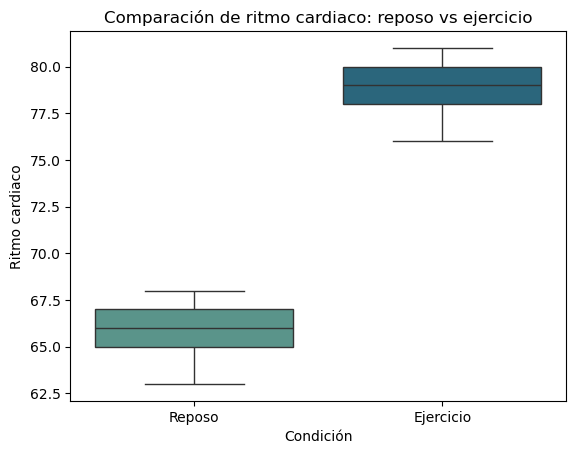

In [5]:
df_melt = df.melt(var_name='Condición', value_name='Ritmo cardiaco')

sns.boxplot(data=df_melt, x='Condición', y='Ritmo cardiaco', hue='Condición', palette='crest', legend=False)
plt.title('Comparación de ritmo cardiaco: reposo vs ejercicio')
plt.show()



Hay una diferencia evidente.

## Prueba t para muestras relacionadas
Verificamos estadísticamente si la diferencia entre ritmos es significativa usando prueba t pareada.

In [6]:
alpha = 0.05
result = stats.ttest_rel(reposo, ejercicio)

print(f'Valor p: {result.pvalue:.4f}')

if result.pvalue < alpha:
    print("Rechazamos la hipótesis nula: la diferencia es significativa")
else:
    print("No podemos rechazar la hipótesis nula: no hay diferencia significativa")


Valor p: 0.0000
Rechazamos la hipótesis nula: la diferencia es significativa


## Interpretación final
Existe una diferencia estadísticamente significativa entre el ritmo cardiaco en reposo y después del ejercicio ligero: el ejercicio realmente eleva el pulso más allá de lo que podríamos esperar por simple variabilidad aleatoria.

La prueba _t_ para muestras relacionadas compara los promedios de dos condiciones y nos ayuda a saber si el cambio observado es confiable o solo producto del azar. Una vez que el valor p es menor al nivel de significancia. Así, validar con datos tus intuiciones sobre el cuerpo o el entrenamiento se vuelve sencillo y objetivo gracias a la estadística.